In [1]:
%env DISPLAY=:0.0
%env OMP_NUM_THREADS=1
%env NUMEXPR_MAX_THREADS=16
%env MKL_NUM_THREADS=1
%env NUMEXPR_NUM_THREADS=1

env: DISPLAY=:0.0
env: OMP_NUM_THREADS=1
env: NUMEXPR_MAX_THREADS=16
env: MKL_NUM_THREADS=1
env: NUMEXPR_NUM_THREADS=1


In [2]:
import sys
sys.path.append("../zusammen/utils")
from sim2fits import AnalysisBuilder

/Users/fran/.virtualenvs/grb/lib/python3.8/site-packages/astromodels/functions/function.py:140: YAMLLoadWarning: calling yaml.load() without Loader=... is deprecated, as the default Loader is unsafe. Please read https://msg.pyyaml.org/load for full details.
  function_definition = my_yaml.load(dct['__doc__'])
/Users/fran/.virtualenvs/grb/lib/python3.8/site-packages/astromodels/core/parameter.py:555: UserWarning: We have set the min_value of xc to 1e-99 because there was a postive transform
  warnings.warn('We have set the min_value of %s to 1e-99 because there was a postive transform' % self.path)


Configuration read from /Users/fran/.threeML/threeML_config.yml



WARNING TqdmExperimentalWarning: Using `tqdm.autonotebook.tqdm` in notebook mode. Use `tqdm.tqdm` instead to force console mode (e.g. in jupyter console)



SynthGRB_0


2020-12-03 18:03:21 Francescas-MacBook-Pro.local astropy[14840] WARNING VerifyWarning: Card is too long, comment will be truncated.
2020-12-03 18:03:21 Francescas-MacBook-Pro.local astropy[14840] WARNING AstropyDeprecationWarning: "clobber" was deprecated in version 2.0 and will be removed in a future version. Use argument "overwrite" instead.

WARNING UserWarning: The TTE file SynthGRB_0/tte_SynthGRB_0_n1.fits contains duplicate time tags and is thus invalid. Contact the FSSC 


WARNING UserWarning: The default choice for MATRIX extension failed:KeyError("Extension ('MATRIX', 1) not found.")available: None 'EBOUNDS' 'SPECRESP MATRIX'


WARNING RuntimeWarning: Minimum MC energy (5.0) is larger than minimum EBOUNDS energy (4.111590385437012)




WARNING UserWarning: The TTE file SynthGRB_0/tte_SynthGRB_0_na.fits contains duplicate time tags and is thus invalid. Contact the FSSC 


WARNING UserWarning: The default choice for MATRIX extension failed:KeyError("Extension ('MATRIX', 1) not found.")available: None 'EBOUNDS' 'SPECRESP MATRIX'


WARNING RuntimeWarning: Minimum MC energy (5.0) is larger than minimum EBOUNDS energy (3.6785571575164795)




WARNING UserWarning: The TTE file SynthGRB_0/tte_SynthGRB_0_n6.fits contains duplicate time tags and is thus invalid. Contact the FSSC 


WARNING UserWarning: The default choice for MATRIX extension failed:KeyError("Extension ('MATRIX', 1) not found.")available: None 'EBOUNDS' 'SPECRESP MATRIX'




WARNING UserWarning: The TTE file SynthGRB_0/tte_SynthGRB_0_b1.fits contains duplicate time tags and is thus invalid. Contact the FSSC 


WARNING UserWarning: The default choice for MATRIX extension failed:KeyError("Extension ('MATRIX', 1) not found.")available: None 'EBOUNDS' 'SPECRESP MATRIX'



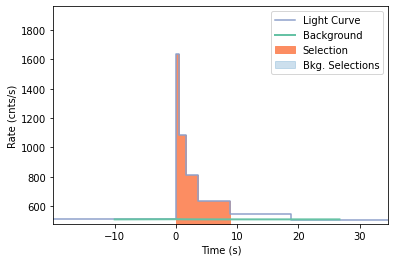

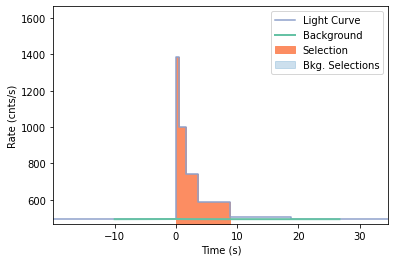

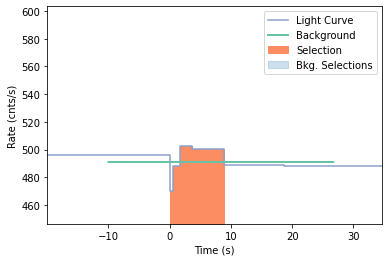

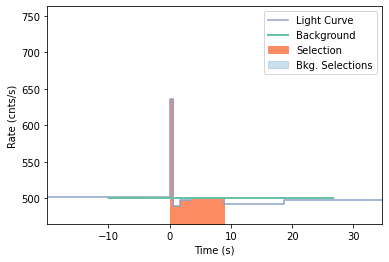

In [3]:
analysis_builder = AnalysisBuilder("data/grb_pop_survey.h5", use_bb=True)

## Debug

In [4]:
import numpy as np
from matplotlib import pyplot as plt
from threeML import *

In [23]:
def get_plugins(grb_name, dets, interval):
    plugin_list = []
    for det in dets:
        pha_file = os.path.join(grb_name, det + ".pha")
        rsp_file = os.path.join(grb_name, det + ".rsp")
        bak_file = os.path.join(grb_name, det + "_bak.pha")
        plugin = OGIPLike(det, pha_file, bak_file, rsp_file, spectrum_number=interval)
        plugin_list.append(plugin)
    
    return DataList(*plugin_list)

In [61]:
grb_name = analysis_builder._survey["SynthGRB_0"].grb.name
dets = analysis_builder._processors[0]._lc_names

datalist = get_plugins(grb_name, dets, 3)


WARNING UserWarning: The default choice for MATRIX extension failed:KeyError("Extension ('MATRIX', 1) not found.")available: None 'EBOUNDS' 'SPECRESP MATRIX' 'SPECRESP MATRIX' 'SPECRESP MATRIX' 'SPECRESP MATRIX' 'SPECRESP MATRIX' 'SPECRESP MATRIX'


WARNING RuntimeWarning: Minimum MC energy (5.0) is larger than minimum EBOUNDS energy (4.111590385437012)


WARNING RuntimeWarning: Minimum MC energy (5.0) is larger than minimum EBOUNDS energy (3.6785571575164795)



Auto-probed noise models:
- observation: poisson
- background: gaussian
Auto-probed noise models:
- observation: poisson
- background: gaussian
Auto-probed noise models:
- observation: poisson
- background: gaussian
Auto-probed noise models:
- observation: poisson
- background: gaussian


In [62]:
spec = Cutoff_powerlaw()
spec.K.prior = Log_uniform_prior(lower_bound=1e-3, upper_bound=100)
spec.index.set_uninformative_prior(Uniform_prior)
spec.xc.prior = Log_uniform_prior(lower_bound=1, upper_bound=1e3)
spec.pivot=100
ps = PointSource('grb',0,0, spectral_shape=spec)
model = Model(ps)

In [63]:
#bayes = BayesianAnalysis(model, datalist)
#bayes.set_sampler("multinest")

In [64]:
jl = JointLikelihood(model, datalist)

best_fit_parameters, likelihood_values = jl.fit()

Best fit values:



,result,unit
parameter,,
grb.spectrum.main.Cutoff_powerlaw.K,(1.3 -0.5 +0.8) x 10,1 / (cm2 keV s)
grb.spectrum.main.Cutoff_powerlaw.index,-1.28 +/- 0.17,
grb.spectrum.main.Cutoff_powerlaw.xc,(5.1 -0.9 +1.1) x 10,keV



Correlation matrix:



1.00,-0.99,0.88
-0.99,1.00,-0.93
0.88,-0.93,1.00



Values of -log(likelihood) at the minimum:



,-log(likelihood)
b1,141.888482
n1,230.279533
n6,197.660151
na,253.428780
total,823.256945



Values of statistical measures:



,statistical measures
AIC,1652.561133
BIC,1665.228863


NotEnoughData: Vector total is -92.56218841367021, cannot rebin at 1e-99 per bin

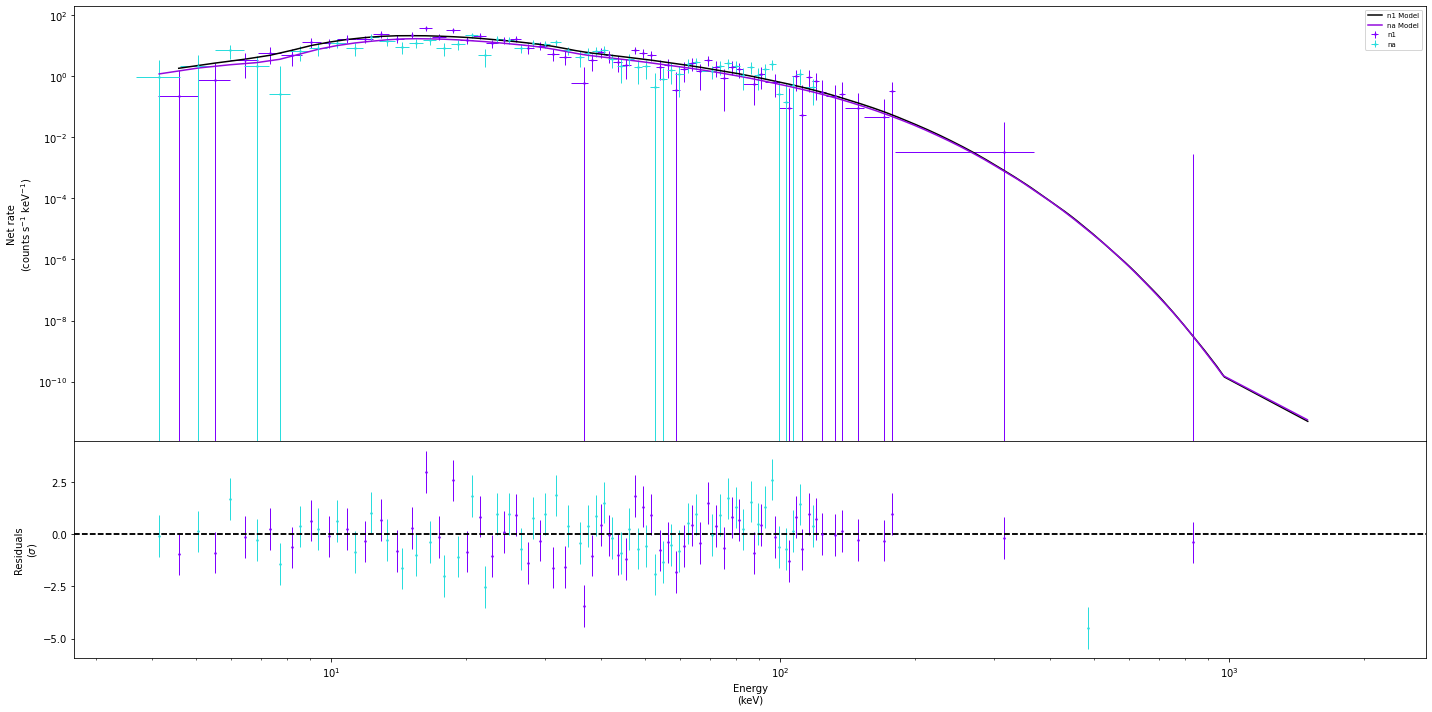

In [65]:
fig = display_spectrum_model_counts(jl, step=False, figsize=(20, 10));